<a href="https://colab.research.google.com/github/95871abhinandankumar/95871abhinandankumar/blob/main/ML_multiclass_classification_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
from sklearn import datasets
import numpy as np
import pandas as pd
iris = datasets.load_iris()

In [281]:
# features of iris dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [282]:
print("target name")
print(iris.target_names)
print("target...")
iris.target

target name
['setosa' 'versicolor' 'virginica']
target...


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [283]:
df = pd.DataFrame(iris.data,columns=[iris.feature_names])
df['target'] = iris.target

print(df)

    sepal length (cm) sepal width (cm)  ... petal width (cm) target
0                 5.1              3.5  ...              0.2      0
1                 4.9              3.0  ...              0.2      0
2                 4.7              3.2  ...              0.2      0
3                 4.6              3.1  ...              0.2      0
4                 5.0              3.6  ...              0.2      0
..                ...              ...  ...              ...    ...
145               6.7              3.0  ...              2.3      2
146               6.3              2.5  ...              1.9      2
147               6.5              3.0  ...              2.0      2
148               6.2              3.4  ...              2.3      2
149               5.9              3.0  ...              1.8      2

[150 rows x 5 columns]


In [284]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
samples = scaling.fit_transform(df[df.columns])
df = pd.DataFrame(samples)

print(df)

            0         1         2         3    4
0    0.222222  0.625000  0.067797  0.041667  0.0
1    0.166667  0.416667  0.067797  0.041667  0.0
2    0.111111  0.500000  0.050847  0.041667  0.0
3    0.083333  0.458333  0.084746  0.041667  0.0
4    0.194444  0.666667  0.067797  0.041667  0.0
..        ...       ...       ...       ...  ...
145  0.666667  0.416667  0.711864  0.916667  1.0
146  0.555556  0.208333  0.677966  0.750000  1.0
147  0.611111  0.416667  0.711864  0.791667  1.0
148  0.527778  0.583333  0.745763  0.916667  1.0
149  0.444444  0.416667  0.694915  0.708333  1.0

[150 rows x 5 columns]


In [285]:
dataset = df.to_numpy()
# print(dataset)

dataset_setosa = np.copy(dataset)

for i in range(len(dataset_setosa)):
  if dataset_setosa[i][-1] == 0:
    dataset_setosa[i][-1] = 1
  else:
    dataset_setosa[i][-1] = 0

# print(dataset_setosa)
# print(dataset)

In [286]:
dataset_versicolor = np.copy(dataset)

for i in range(len(dataset_versicolor)):
  if dataset_versicolor[i][-1] == 0.5:
    dataset_versicolor[i][-1] = 1
  else:
    dataset_versicolor[i][-1] = 0
# print(dataset)
# print(dataset_versicolor)

In [287]:
dataset_verginica = np.copy(dataset)

for i in range(len(dataset_verginica)):
  if dataset_verginica[i][-1] != 1:
    dataset_verginica[i][-1] = 0
print(dataset_verginica)

[[0.22222222 0.625      0.06779661 0.04166667 0.        ]
 [0.16666667 0.41666667 0.06779661 0.04166667 0.        ]
 [0.11111111 0.5        0.05084746 0.04166667 0.        ]
 [0.08333333 0.45833333 0.08474576 0.04166667 0.        ]
 [0.19444444 0.66666667 0.06779661 0.04166667 0.        ]
 [0.30555556 0.79166667 0.11864407 0.125      0.        ]
 [0.08333333 0.58333333 0.06779661 0.08333333 0.        ]
 [0.19444444 0.58333333 0.08474576 0.04166667 0.        ]
 [0.02777778 0.375      0.06779661 0.04166667 0.        ]
 [0.16666667 0.45833333 0.08474576 0.         0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667 0.        ]
 [0.13888889 0.58333333 0.10169492 0.04166667 0.        ]
 [0.13888889 0.41666667 0.06779661 0.         0.        ]
 [0.         0.41666667 0.01694915 0.         0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667 0.        ]
 [0.38888889 1.         0.08474576 0.125      0.        ]
 [0.30555556 0.79166667 0.05084746 0.125      0.        ]
 [0.22222222 0

In [288]:
import math

In [289]:
def hypothesis(w,dataset):
  y=w[0]
  sample =dataset[:-1]
  sample = np.concatenate([[1], sample])
  y = np.multiply(w, sample)
  y = np.sum(y)
  gx = 1/(1+(math.e)**(-1*y))
  return gx

In [290]:
# to calculate the predicted value with the help of hypothesis function
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, dataset[i]))
  
  return np.array(predicted)


# to calculate mean square error
def MSE(predicted, actual):
  return np.square(np.subtract(predicted, actual)).mean()/2

print(MSE(np.array([1,2,3,4]), np.array([1,2,3,4]),))


def accurracy(predicted, actual):
  ans = 0
  for i in range(len(predicted)):
    if predicted[i] >= 0.5 and actual[i] == 1:
      ans += 1
    elif predicted[i] <= 0.5 and actual[i] == 0:
      ans += 1
  return ans


0.0


In [291]:

# to update w using stochastic gradient decendent
def update_parameter_stochastic(w, alpha, dataset):
  np.random.shuffle(dataset)
  m = len(dataset)
  for j in range(m):
    hy = hypothesis(w, np.array(dataset[j]))
    w[0] = w[0] - (alpha /m)*(hy- dataset[:, -1][j])
    for i in range(1, len(w)):
      w[i] = w[i] - (alpha /m)*((hy- dataset[:, -1][j])* dataset[:, i-1][j])
  return w

In [292]:
def logistic_regression(epoch, alpha, rho, w, train_dataset, validation):
  pre_MSE = 0
  curr_MSE = 0
  trains_MSE=[]
  validations_MSE=[]
  for itr in range(epoch):
    predicted = predicted_values(w, train_dataset)
    curr_MSE = MSE(predicted, train_dataset[:,-1])
    w = update_parameter_stochastic(w, alpha, train_dataset)
    
    trains_MSE.append(curr_MSE)
    predicted = predicted_values(w, validation)
    validations_MSE.append(MSE(predicted, validation[:,-1]))

    if abs(curr_MSE - pre_MSE) <= rho:
      break;
    pre_MSE = curr_MSE
  return w, trains_MSE, validations_MSE

In [293]:
# dataset_setosa
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as sk_split

train_setosa_x,test_setosa_x,train_setosa_y,test_setosa_y=sk_split(dataset_setosa[:, :-1], dataset_setosa[:, -1],train_size=0.3)

train_setosa = np.concatenate((train_setosa_x, train_setosa_y.reshape(len(train_setosa_y), -1)), axis=1)
print(train_setosa.shape) 

validation_setosa_x,test_setosa_x,validation_setosa_y,test_setosa_y=sk_split(test_setosa_x, test_setosa_y,train_size=0.4/0.7)

validation_setosa = np.concatenate((validation_setosa_x, validation_setosa_y.reshape(len(validation_setosa_y), -1)), axis=1)
print(validation_setosa.shape)


test_setosa = np.concatenate((test_setosa_x, test_setosa_y.reshape(len(test_setosa_y), -1)), axis=1)
print(test_setosa.shape)
# validation_setosa
# test_setosa

(45, 5)
(60, 5)
(45, 5)


alpha :  0.01
[0.9862417022392393, 0.9922483765928732, 0.9954247606142806, 0.9906681410421402, 0.9908894257730518]
0.25756725799871905
20
alpha :  0.1
[0.3630212635679168, 0.6329704973090035, 0.7909096825373558, 0.556581497455527, 0.5667584201462197]
0.214015456605782
20
alpha :  0.2
[-0.11395729977100341, 0.33881058862380636, 0.643497604163529, 0.19571728550326553, 0.21369856650050234]
0.1501891770440274
20
alpha :  0.3
[-0.4039175643818125, 0.13748826219747778, 0.5693230685255917, -0.06017320523407483, -0.03654138188739275]
0.11406223691903049
31
alpha :  0.4
[-0.5671911023659267, 0.00278679597165016, 0.5449975799399146, -0.24023151530204268, -0.2116071207449517]
0.10241013366004527
25
alpha :  0.5
[-0.6556785840482744, -0.09575660781492892, 0.5474768365659535, -0.37798353484818903, -0.3458932757836911]
0.09882981135545686
25
alpha :  0.6
[-0.6939818228539948, -0.16480757142091412, 0.5751193840569142, -0.485967595304508, -0.4495695943872417]
0.09664973439384213
25
alpha :  0.7
[-0.70

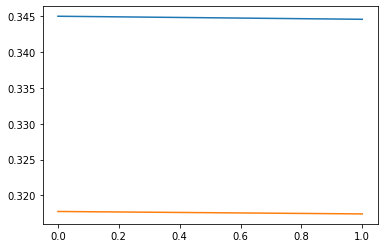

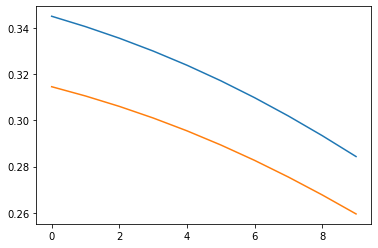

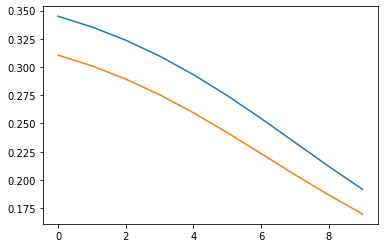

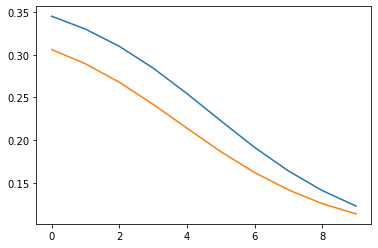

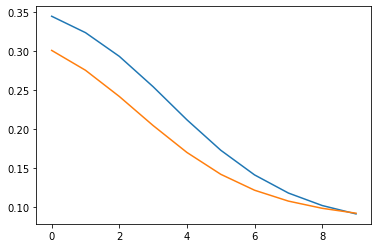

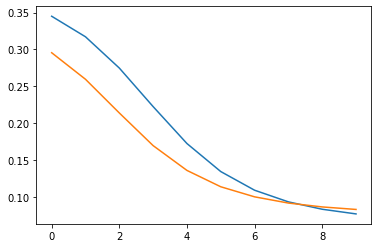

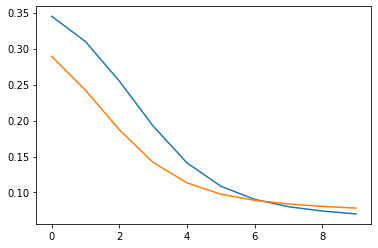

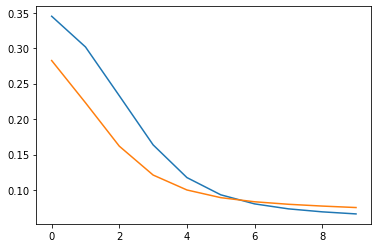

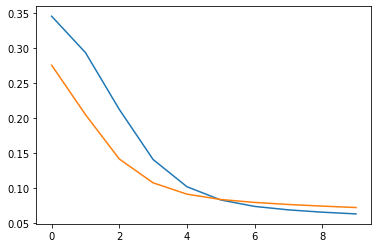

In [300]:
alpha = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, .7, .8]


for i in alpha:
  print("alpha : ", i)
  w_setosa = [1 for _ in range(5)]
  w_setosa, st_mse, sv_mse= logistic_regression(10, i, 0.001, w_setosa, train_setosa, validation_setosa)

  predicted = predicted_values(w_setosa, test_setosa)
  # # print(predicted)
  test_MSE = MSE(predicted, test_setosa[:,-1])
  test_acc = accurracy(predicted, test_setosa[:,-1])


  epoch = [i for i in range(len(st_mse))]
  fig, ax = plt.subplots()
  ax.plot(epoch, st_mse)
  ax.plot(epoch, sv_mse)
  print(w_setosa)
  print(test_MSE)
  print(test_acc)

In [295]:
train_versicolor_x,test_versicolor_x,train_versicolor_y,test_versicolor_y=sk_split(dataset_versicolor[:, :-1], dataset_versicolor[:, -1],train_size=0.3)

train_versicolor = np.concatenate((train_versicolor_x, train_versicolor_y.reshape(len(train_versicolor_y), -1)), axis=1)
print(train_versicolor.shape) 

validation_versicolor_x,test_versicolor_x,validation_versicolor_y,test_versicolor_y=sk_split(test_versicolor_x, test_versicolor_y,train_size=0.4/0.7)

validation_versicolor = np.concatenate((validation_versicolor_x, validation_versicolor_y.reshape(len(validation_versicolor_y), -1)), axis=1)
print(validation_versicolor.shape)


test_versicolor = np.concatenate((test_versicolor_x, test_versicolor_y.reshape(len(test_versicolor_y), -1)), axis=1)
print(test_versicolor.shape)

(45, 5)
(60, 5)
(45, 5)


alpha :  0.01
[0.9876420766465844, 0.9946751964560321, 0.993455813583689, 0.9947033402108069, 0.9944844407528953]
0.283799605010769
15
alpha :  0.1
[0.42187520753207, 0.7480604984503495, 0.6920891438791643, 0.7492898203114541, 0.738222878021587]
0.23546326019609212
15
alpha :  0.2
[-0.040370801496390836, 0.5419777837077537, 0.43971689447142387, 0.5452787620319484, 0.5229855215406475]
0.17892689823749847
15
alpha :  0.3
[-0.3629588446548579, 0.3979258924914654, 0.25412641279925563, 0.4059090271921256, 0.37259661443676767]
0.14002676061110716
28
alpha :  0.4
[-0.5723119615979738, 0.3056773023162711, 0.12158976731661719, 0.32217274464417195, 0.27830101470918606]
0.12161414005045636
17
alpha :  0.5
[-0.7056310186261217, 0.2523277450149168, 0.02453277394546252, 0.2802801504828337, 0.22568599915940815]
0.11432847664410253
29
alpha :  0.6
[-0.7876723419393443, 0.22127925614048552, -0.04840010711470571, 0.2609377039365823, 0.19587021461277523]
0.11148698771058116
30
alpha :  0.7
[-0.8407976906

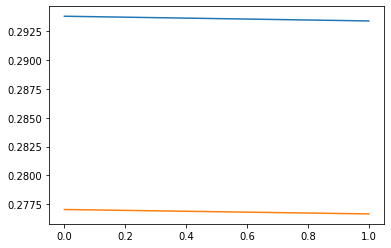

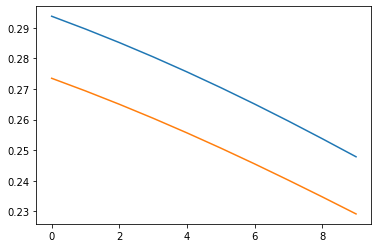

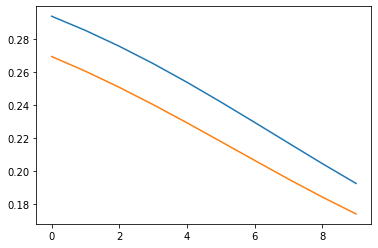

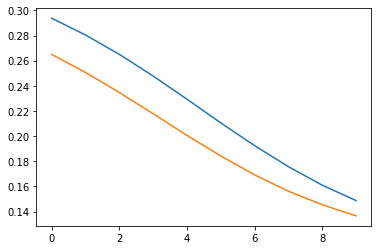

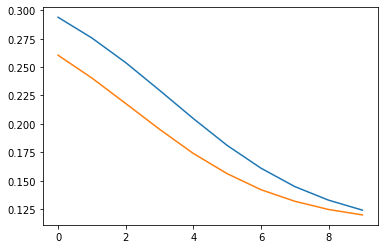

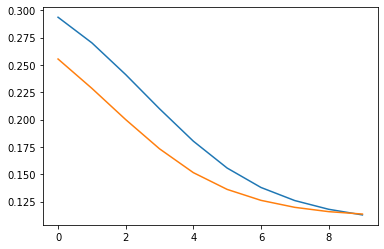

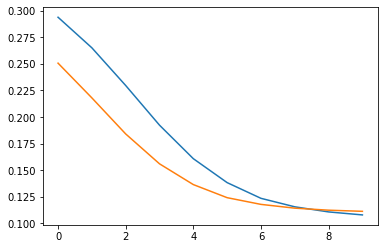

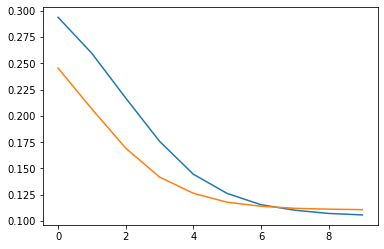

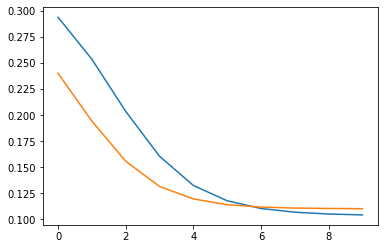

In [302]:
alpha = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .8]


for i in alpha:
  print("alpha : ", i)
  w_versicolor = [1 for _ in range(5)]
  w_versicolor, st_mse, sv_mse= logistic_regression(10, i, 0.001, w_versicolor, train_versicolor, validation_versicolor)

  predicted = predicted_values(w_versicolor, test_versicolor)
  # # print(predicted)
  test_MSE = MSE(predicted, test_versicolor[:,-1])
  test_acc = accurracy(predicted, test_versicolor[:,-1])

  print(w_versicolor)
  epoch = [i for i in range(len(st_mse))]
  fig, ax = plt.subplots()
  ax.plot(epoch, st_mse)
  ax.plot(epoch, sv_mse)
  print(test_MSE)
  print(test_acc)

In [297]:
train_verginica_x,test_verginica_x,train_verginica_y,test_verginica_y=sk_split(dataset_verginica[:, :-1], dataset_verginica[:, -1],train_size=0.3)

train_verginica = np.concatenate((train_verginica_x, train_verginica_y.reshape(len(train_verginica_y), -1)), axis=1)
print(train_verginica.shape) 

validation_verginica_x,test_verginica_x,validation_verginica_y,test_verginica_y=sk_split(test_verginica_x, test_verginica_y,train_size=0.4/0.7)

validation_verginica = np.concatenate((validation_verginica_x, validation_verginica_y.reshape(len(validation_verginica_y), -1)), axis=1)
print(validation_verginica.shape)


test_verginica = np.concatenate((test_verginica_x, test_verginica_y.reshape(len(test_verginica_y), -1)), axis=1)
print(test_verginica.shape)

(45, 5)
(60, 5)
(45, 5)


alpha :  0.01
[0.9877454008423882, 0.9962658650577395, 0.9948136371249484, 0.9960110834953455, 0.9964197873096882]
0.2591606272793012
17
alpha :  0.1
[0.42320263260980845, 0.8248283999448037, 0.7560102208324565, 0.8132662846826678, 0.8328261858507037]
0.21299790584036843
17
alpha :  0.2
[-0.056807199249500395, 0.6833695422116378, 0.5528811001786194, 0.6642459022453181, 0.7010852464823616]
0.16004145464754344
17
alpha :  0.3
[-0.42180990762905723, 0.585892898177778, 0.3980694620674982, 0.5645371076315666, 0.6161335626002965]
0.12180452110786996
21
alpha :  0.4
[-0.6878943528395987, 0.5300051825567561, 0.2834252397028036, 0.5127570235863651, 0.5770282366903663]
0.10214949029783144
32
alpha :  0.5
[-0.8825075339854855, 0.5036865355233834, 0.199828299303876, 0.49289584804196435, 0.5681366214456355]
0.0935226357122076
38
alpha :  0.6
[-1.0212602075199437, 0.5003022222642205, 0.13832006154488916, 0.5004763727433212, 0.5856842996810248]
0.08966744460581383
43
alpha :  0.7
[-1.1404417805648595

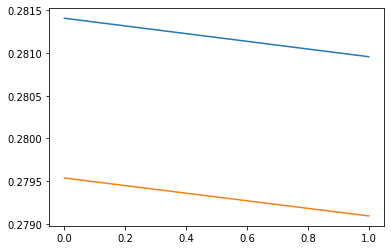

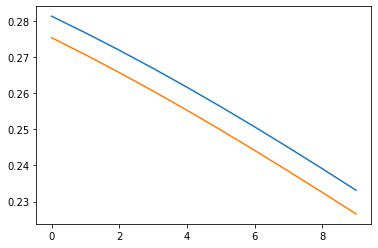

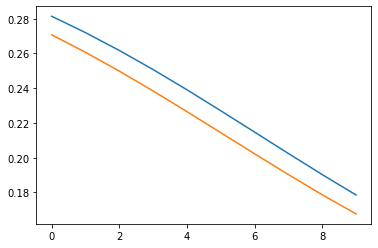

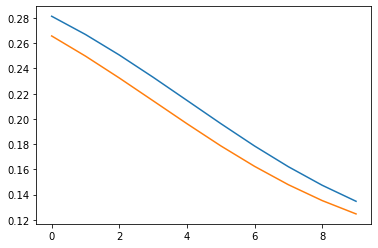

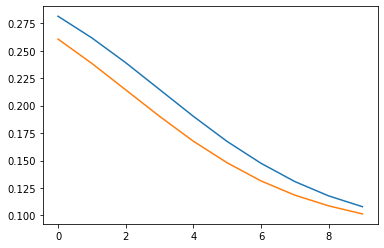

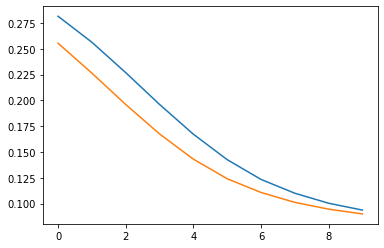

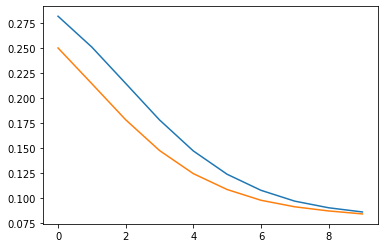

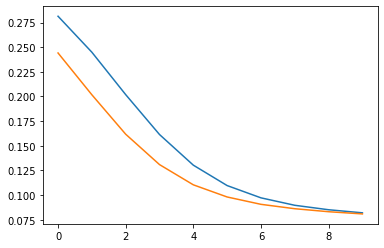

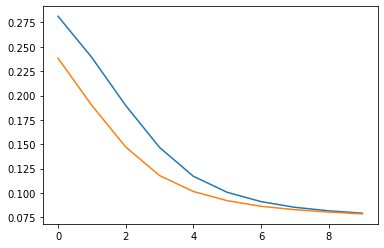

In [298]:
alpha = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


for i in alpha:
  print("alpha : ", i)
  w_verginica = [1 for _ in range(5)]
  w_verginica, st_mse, sv_mse= logistic_regression(10, i, 0.001, w_verginica, train_verginica, validation_verginica)

  predicted = predicted_values(w_verginica, test_verginica)
  # # print(predicted)
  test_MSE = MSE(predicted, test_verginica[:,-1])
  test_acc = accurracy(predicted, test_verginica[:,-1])

  print(w_verginica)
  epoch = [i for i in range(len(st_mse))]
  fig, ax = plt.subplots()
  ax.plot(epoch, st_mse)
  ax.plot(epoch, sv_mse)
  print(test_MSE)
  print(test_acc)

In [312]:

from sklearn.linear_model import LogisticRegression
alpha = 0.8
w_setosa = [-0.644555261391502, -0.07498499966968725, 0.5438893976191796, -0.3502222962256086, -0.3189308254829807]
w_versicolor = [-0.6790777386826046, 0.2620555217630228, 0.04346079048778072, 0.2871631722831362, 0.23334405178907236]
w_verginica = [-1.224474874416547, 0.523527961280033, 0.04779363150398708, 0.54856226558776, 0.6518061298574799]


from sklearn.model_selection import train_test_split


tests_size = [.1, .25, 0.3, 0.4, 0.50, 0.65 , 0.75 ,0.8]
for size_ratio in tests_size:
  x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=size_ratio, random_state=0)

  lr = LogisticRegression()
  lr.fit(x_train, y_train)
  score = lr.score(x_test, y_test)
  print(score)



1.0
0.9736842105263158
0.9777777777777777
0.9166666666666666
0.9333333333333333
0.9081632653061225
0.9292035398230089
0.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
